In [15]:
# IMPORTING THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score 

1) UNDERSTANDING THE DATA;
We use the same procedure as in other models

In [16]:
df=pd.read_csv("dataset.csv")
df.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [17]:
df.shape

(1781, 21)

In [18]:
#view columns in the dataset
df.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

2) CLEANING AND PRE-PROCESSING THE DATA

In [19]:
df['CONTENT_LENGTH']=df['CONTENT_LENGTH'].interpolate()
df['DNS_QUERY_TIMES']=df['DNS_QUERY_TIMES'].interpolate()
df['SERVER']=df['SERVER'].interpolate()
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             1781 non-null   float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [20]:
for data in [df]:
    data['URL_LENGTH'] = data['URL_LENGTH'].astype(str)
    data['NUMBER_SPECIAL_CHARACTERS'] = data['NUMBER_SPECIAL_CHARACTERS'].astype(str)
    data['CONTENT_LENGTH'] = data['CONTENT_LENGTH'].astype(str)
    data['TCP_CONVERSATION_EXCHANGE'] = data['TCP_CONVERSATION_EXCHANGE'].astype(str)
    data['DIST_REMOTE_TCP_PORT'] = data['DIST_REMOTE_TCP_PORT'].astype(str)
    data['REMOTE_IPS'] = data['REMOTE_IPS'].astype(str)
    data['APP_BYTES'] = data['APP_BYTES'].astype(str)
    data['SOURCE_APP_PACKETS'] = data['SOURCE_APP_PACKETS'].astype(str)
    data['REMOTE_APP_PACKETS'] = data['REMOTE_APP_PACKETS'].astype(str)
    data['SOURCE_APP_BYTES'] = data['SOURCE_APP_BYTES'].astype(str)
    data['REMOTE_APP_BYTES'] = data['REMOTE_APP_BYTES'].astype(str)
    data['APP_PACKETS'] = data['APP_PACKETS'].astype(str)
    data['DNS_QUERY_TIMES'] = data['DNS_QUERY_TIMES'].astype(str)
    

In [21]:
dependentVar = 'Type'
X = df.loc[:, df.columns != dependentVar]
y = df[dependentVar].values

In [22]:
X = pd.get_dummies(X)

In [23]:
sc = StandardScaler()
X= sc.fit_transform(X)

In [24]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 32)

3) SUPPORT VECTOR MACHINE CLASSIFIER

In [25]:
from sklearn.svm import SVC 
SupportVectorClassModel = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto',
    kernel='linear', max_iter=-1, probability=True, random_state=0,shrinking=True, tol=0.001, verbose=False)
SupportVectorClassModel.fit(X_train,y_train)


SVC(gamma='auto', kernel='linear', probability=True, random_state=0)

In [26]:
from sklearn.metrics import accuracy_score 
y_pred = SupportVectorClassModel.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)*100
print(accuracy)

93.55742296918767


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
clf_cv_score = cross_val_score(SupportVectorClassModel, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(clf_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - SVM: ", clf_cv_score.mean())

=== Confusion Matrix ===
[[314   0]
 [ 23  20]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       314
           1       1.00      0.47      0.63        43

    accuracy                           0.94       357
   macro avg       0.97      0.73      0.80       357
weighted avg       0.94      0.94      0.92       357



=== All AUC Scores ===
[0.86855819 0.9965035  0.96765734 0.98717949 0.92628205 0.92249417
 0.89869578 1.         0.99696694 1.        ]


=== Mean AUC Score ===
Mean AUC Score - SVM:  0.9564337467203711


Plotting an ROC for SVM Classifiers

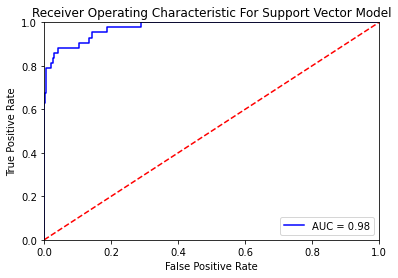

In [28]:
# calculate the fpr and tpr for all thresholds of the Support Vector Machine classification
import sklearn.metrics as metrics
probs = SupportVectorClassModel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic For Support Vector Model')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()